In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

텐서플로우 라이브러리를 임포트 하세요.

In [2]:
import tensorflow as tf

텐서플로우에는 MNIST 데이터를 자동으로 로딩해 주는 헬퍼 함수가 있습니다. "MNIST_data" 폴더에 데이터를 다운로드하고 훈련, 검증, 테스트 데이터를 자동으로 읽어 들입니다. `one_hot` 옵션을 설정하면 정답 레이블을 원핫벡터로 바꾸어 줍니다.

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


`minist.train.images`에는 훈련용 이미지 데이터가 있고 `mnist.test.images`에는 테스트용 이미지 데이터가 있습니다. 이 데이터의 크기를 확인해 보세요.

`matplotlib`에는 이미지를 그려주는 `imshow()` 함수가 있습니다. 우리가 읽어 들인 `mnist.train.images`는 길이 784의 배열입니다. 55,000개 중에서 원하는 하나를 출력해 보세요.

이미지로 표현하려면 원본 이미지 사각형 크기인 [28, 28]로 변경해 줍니다. 그리고 흑백이미지 이므로 컬러맵을 그레이 스케일로 지정합니다.

In [ ]:
plt.imshow(mnist.train.images[..].reshape([.., ..]), cmap=plt.get_cmap('gray_r'))

`mnist.train.labels`에는 정답값 y 가 들어 있습니다. 원핫벡터로 로드되었는지 55,000개의 정답 데이터 중 하나를 확인해 보세요.

In [ ]:
mnist.train.labels[..]

훈련 데이터는 55,000개로 한꺼번에 처리하기에 너무 많습니다. 그래서 미니배치 그래디언트 디센트 방식을 사용하려고 합니다. 미니배치 방식을 사용하려면 훈련 데이터에서 일부를 쪼개어 반복하여 텐서플로우 모델에 주입해 주어야 합니다.

텐서플로우 모델이 동작하면서 입력 데이터를 받기위해 플레이스 홀더를 정의합니다. 플레이스 홀더는 x(이미지), y(정답 레이블) 두가지입니다.

`x = tf.placeholder("float32", [None, 784])
y = tf.placeholder("float32", shape=[None, 10])`

In [4]:
x = tf.placeholder("float", shape=[None, 784])
y = tf.placeholder("float", shape=[None, 10])

콘볼루션을 적용하려면 1차원 배열이 아닌 이미지와 같은 모양으로 바꾸어 주어야 합니다. `reshape` 명령을 이용하면 텐서의 차원을 바꿀 수 있습니다. 첫번째 차원은 미니 배치 데이터의 개수이므로 그대로 두고, 두번째 차원을 28x28x1 로 변경합니다.

`x_image = tf.reshape(x, [-1,28,28,1])`

In [5]:
x_image = tf.reshape(x, [-1,28,28,1])
x_image

x_image= Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)


콘볼루션을 적용하기 위해 tf.layers.conv2d 함수를 사용하겠습니다. 커널 사이즈는 5x5 이고 32개를 사용합니다. 스트라이드는 1x1 이고 'same' 패딩을 사용합니다. 활성화 함수는 렐루 함수를 적용합니다.

풀링은 tf.layers.max_pooling2d 를 사용하여 2x2 맥스 풀링을 적용합니다.

`conv1 = tf.layers.conv2d(x_image, 32, (5, 5), strides=(1, 1), 
                         padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, pool_size=(2, 2), strides=(2, 2))`

In [6]:
conv1 = tf.layers.conv2d(x_image, 32, (5, 5), strides=(1, 1), 
                         padding="same", activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(conv1, pool_size=(2, 2), strides=(2, 2))

입력 데이터와 콘볼루션된 직후와 풀링된 직후의 텐서의 크기를 비교해 보세요.

In [7]:
print(x_image.get_shape())
print(conv1.get_shape())
print(pool1.get_shape())

(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)


두번째 콘볼루션의 커널 사이즈는 5x5 이고 64개를 사용합니다. 스트라이드는 1x1 이고 'same' 패딩을 사용합니다. 활성화 함수는 렐루 함수를 적용합니다.

풀링은 tf.layers.max_pooling2d 를 사용하여 2x2 맥스 풀링을 적용합니다.

`conv2 = tf.layers.conv2d(pool1, 64, (5, 5), strides=(1, 1), 
                         padding="same", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, pool_size=(2, 2), strides=(2, 2))`

In [8]:
conv2 = tf.layers.conv2d(pool1, 64, (5, 5), strides=(1, 1), 
                         padding="same", activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(conv2, pool_size=(2, 2), strides=(2, 2))

두번째 콘볼루션된 후와 풀링된 후의 텐서 크기를 비교해 보세요.

In [9]:
print(conv2.get_shape())
print(pool2.get_shape())

(?, 14, 14, 64)
(?, 7, 7, 64)


덴스 네트워크에 연결하기 위해 두번째 풀링 결과를 펼칩니다. 이 때에도 `reshape` 명령을 사용합니다. 첫번째 차원은 상관없이 2~4번째 차원을 하나로 합칩니다.

이전과 달리 행렬연산을 직접하지 않고 `tf.layers.dense` 함수를 사용하여 레이어를 구성합니다. 활성화 함수는 렐루 함수를 사용합니다.

`pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
fc = tf.layers.dense(pool2_flat, 1024, activation=tf.nn.relu)`

In [10]:
pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
fc = tf.layers.dense(pool2_flat, 1024, activation=tf.nn.relu)

최종 출력 레이어에 전달하기 전에 드롭 아웃을 적용하여 학습시에 일부 유닛을 비활성화 시키려고 합니다. 하지만 추론시에는 모든 뉴런을 활성화시켜야 하므로 계산 그래프에 상수로 고정시키지 않고 플레이스홀더로 지정하여 외부에서 드롭 아웃 비율을 지정할 수 있도로 합니다.

`drop_prob = tf.placeholder("float")
fc_drop = tf.layers.dropout(fc, rate=drop_prob)`

In [11]:
drop_prob = tf.placeholder("float")
fc_drop = tf.layers.dropout(fc, rate=drop_prob)

마지막 출력 레이어를 구성하고 출력값을 정규화하여 정답과 비교하려고 소프트맥스 함수를 적용합니다.

`z = tf.layers.dense(fc_drop, 10)
y_hat=tf.nn.softmax(z)`

In [12]:
z = tf.layers.dense(fc_drop, 10)
y_hat=tf.nn.softmax(z)

손실 함수 크로스 엔트로피를 계산하기 위해 위에서 구한 y_hat을 사용해도 되지만 텐서플로우에는 소프트맥스를 통과하기 전의 값 z 를 이용하여 소프트맥스 크로스 엔트로피를 계산해 주는 함수를 내장하고 있습니다. `softmax_cross_entropy`를 이용하여 z 와 정답 y 의 손실을 계산합니다.

`loss = tf.losses.softmax_cross_entropy(y, z)`

학습속도 0.5로 경사하강법을 적용하고 위에서 만든 손실 함수를 이용해 훈련 노드를 생성합니다.

`optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)`

In [13]:
loss = tf.losses.softmax_cross_entropy(y, z)
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

올바르게 분류된 정확도를 계산하려면 정답을 가지고 있는 원핫벡터인 y 와 소프트맥스를 통과한 원핫벡터인 y_hat을 비교해야 합니다. 이 두 텐서는 [None, 10]의 크기를 가지고 있습니다. 따라서 행방향(1)으로 가장 큰 값을 가진 인덱스(argmax)를 찾아서 같은지(equal) 확인하면 됩니다.

`correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))`

correct_prediction은 [True, False, ...] 와 같은 배열이므로 불리언을 숫자(1,0)로 바꾼다음(cast) 전체를 합하여 평균을 내면 정확도 값을 얻을 수 있습니다.

`accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))`

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

세션 객체를 만들고 모델에 사용할 변수를 초기화합니다.

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

5000번 반복을 하면서 훈련 데이터에서 100개씩 뽑아내어(mnist.train.next_batch) 모델에 드롭아웃 비율과 함께 주입합니다. 모델의 플레이스 홀더에 주입하려면 플레이스 홀더의 이름과 넘겨줄 값을 딕셔너리 형태로 묶어서 feed_dict 매개변수에 전달합니다.

계산할 값은 훈련 노드 train과 학습 과정을 그래프로 출력하기 위해 손실값 loss를 계산하여 costs 리스트에 누적합니다.

In [16]:
costs = []
for i in range(5000):
    x_data, y_data = mnist.train.next_batch(100)
    _, cost = sess.run([train, loss], 
                       feed_dict={x: x_data, y: y_data, drop_prob: 0.5})
    costs.append(cost)

costs 리스트를 그래프로 출력합니다.

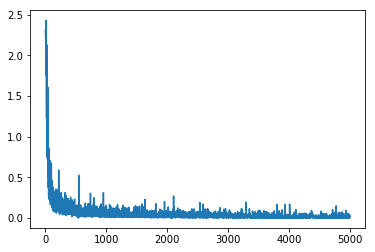

In [17]:
plt.plot(costs)

정확도를 계산하기 위해 만든 노드 accuracy를 실행합니다. 이때 입력 데이터는 mnist.test 로 훈련시에 사용하지 않았던 데이터입니다. accuracy를 계산할 때는 모든 뉴런을 사용하기 위해 드롭아웃 비율을 1로 지정해야 합니다.

`sess.run(accuracy, feed_dict={x: mnist.test.images, 
                              y: mnist.test.labels, drop_prob: 1.0})`

In [18]:
sess.run(accuracy, feed_dict={x: mnist.test.images, 
                              y: mnist.test.labels, drop_prob: 1.0})

0.98970002

실제 이미지와 예측 값이 동일한지 확인하기 위해 테스트 데이터 앞의 5개 이미지와 예측 값을 차례대로 출력해 봅니다.

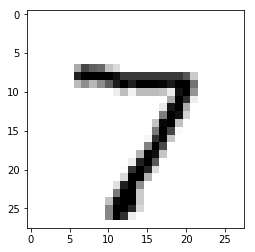

[7]


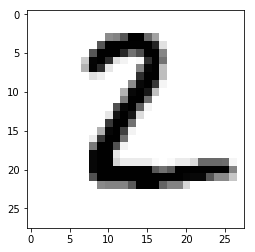

[2]


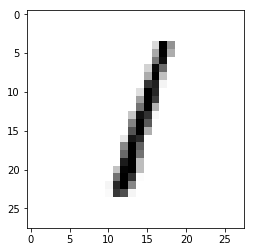

[1]


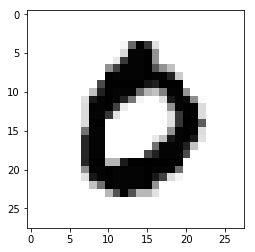

[0]


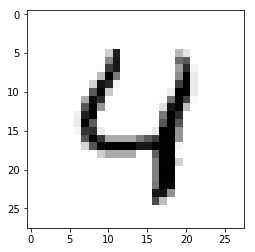

[4]


In [19]:
for i in range(5):
    plt.imshow(mnist.test.images[i].reshape([28, 28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    print(sess.run(tf.argmax(y_hat,1), feed_dict={x: mnist.test.images[i].reshape([1,784]), 
                                                  drop_prob: 1.0}))

학습된 변수를 모두 출력해 봅니다. 여기에는 두개의 콘볼루션 레이어의 가중치와 바이어스, 두개의 덴스 레이어의 가중치와 바이어스가 있습니다.

In [56]:
[x.name for x in tf.global_variables()]

['conv2d/kernel:0',
 'conv2d/bias:0',
 'conv2d_1/kernel:0',
 'conv2d_1/bias:0',
 'dense/kernel:0',
 'dense/bias:0',
 'dense_1/kernel:0',
 'dense_1/bias:0']

첫번째 콘볼루션 레이어의 가중치 텐서의 값을 추출합니다. 이 가중치는 위에서 우리가 정의했던 것과 같이 5x5 사이즈의 32개를 합친 것입니다.

In [54]:
with tf.variable_scope('conv2d', reuse=True):
    kernel = tf.get_variable('kernel')

weight = sess.run(kernel)
weight.shape

(5, 5, 1, 32)

이 가중치를 한개씩 이미지로 출력해 보겠습니다. 첫번째 콘볼루션 레이어에서 학습한 것을 눈으로 확인할 수 있나요?

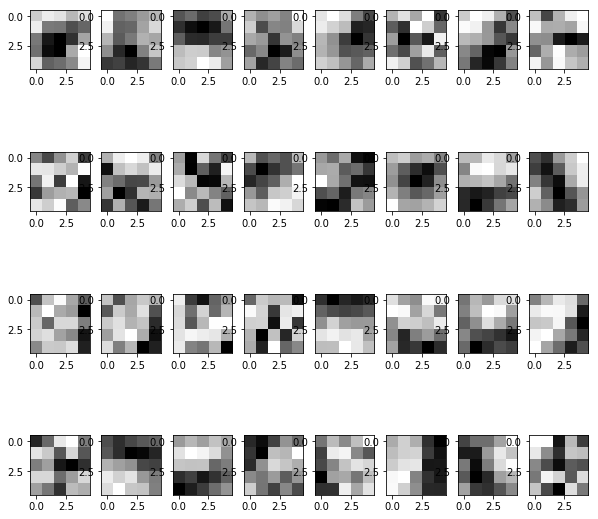

In [55]:
fig, axes = plt.subplots(4, 8, figsize=(10, 10))
for i in range(4):
    for j in range(8):
        axes[i][j].imshow(weight[:, :, :, i*8+j].reshape([5, 5]), cmap=plt.get_cmap('gray_r'))
plt.show()